In [24]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [25]:
T = 100.
z0 = 100.
b0 = 10.
zt = 100.
g = 9.81

In [26]:
def euler_func(dt):
    N = int(T/dt)+1
    t = numpy.linspace(0., T, N)
    u = numpy.array([z0, b0])
    z = numpy.empty_like(t)
    z[0] = z0
    for n in range(1,N):
        u = u + dt*numpy.array([u[1], g*(1-u[0]/zt)])
        z[n] = u[0]
    return z

In [27]:
def get_error(z, dt):
    N = len(z)
    t = numpy.linspace(0., T, N)
    z_exact = b0*(zt/g)**0.5*numpy.sin((g/zt)**0.5*t) + (z0-zt)*numpy.cos((g/zt)**0.5*t) + zt
    return dt*numpy.sum(numpy.abs(z-z_exact))

In [28]:
dt_values = numpy.array([0.1, 0.05, 0.01, 0.005, 0.001])
z_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)
error_values = numpy.empty_like(dt_values)
for i, dt in enumerate(dt_values):
    z_values[i] = euler_func(dt)
    error_values[i] = get_error(z_values[i], dt)

[ 0.1    0.05   0.01   0.005  0.001]
[ 595.36733833  272.67739754   50.96686962   25.2726943     5.02119422]


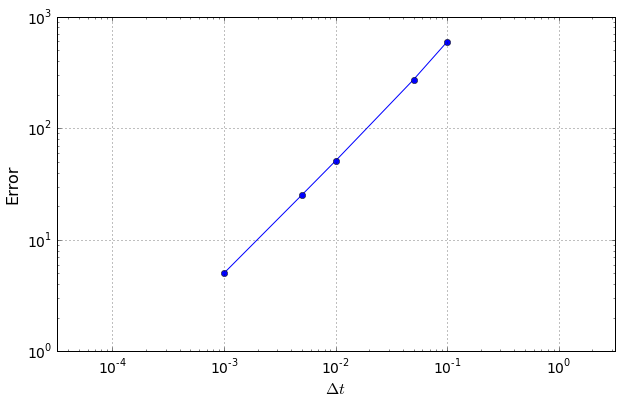

In [29]:
pyplot.figure(figsize=(10,6))
pyplot.tick_params(axis='both', labelsize=14)
pyplot.grid(True)
pyplot.xlabel('$\Delta t$', fontsize=16)
pyplot.ylabel('Error', fontsize=16)
pyplot.loglog(dt_values, error_values, 'bo-')
pyplot.axis('equal')
print dt_values
print error_values

0.1
[ 100.          101.          102.         ...,   91.2989138    92.90712607
   94.5238741 ]
0.05
[ 100.          100.5         101.         ...,   94.75726869   95.39076488
   96.02554684]
0.01
[ 100.          100.1         100.2        ...,   96.60653005   96.71101708
   96.81553741]
0.005
[ 100.          100.05        100.1        ...,   96.79319077   96.84418536
   96.89518782]
0.001
[ 100.          100.01        100.02       ...,   96.93628874   96.94629199
   96.95629554]


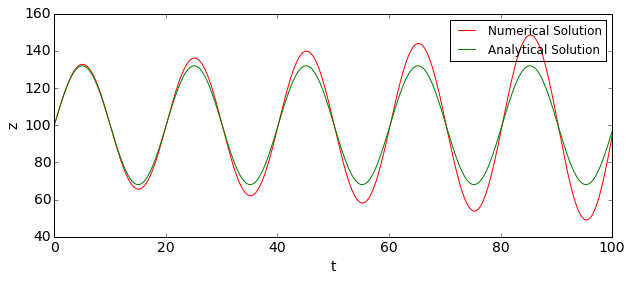

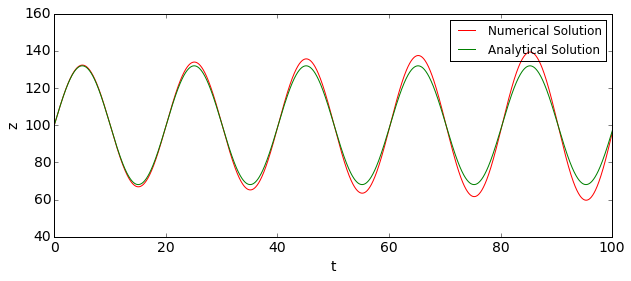

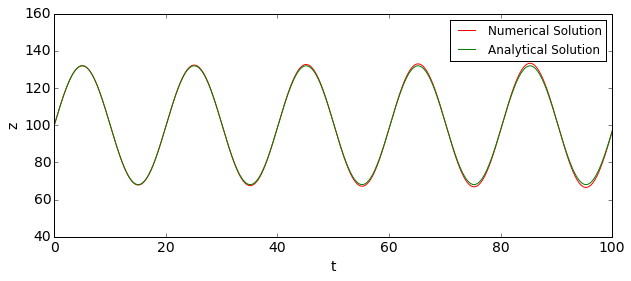

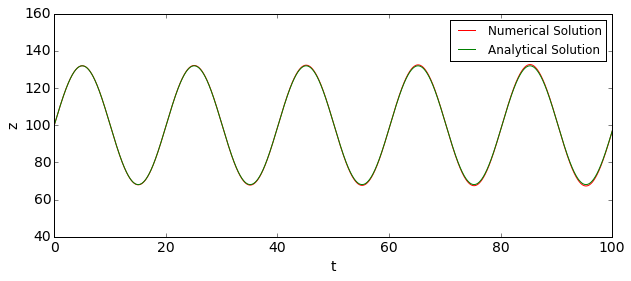

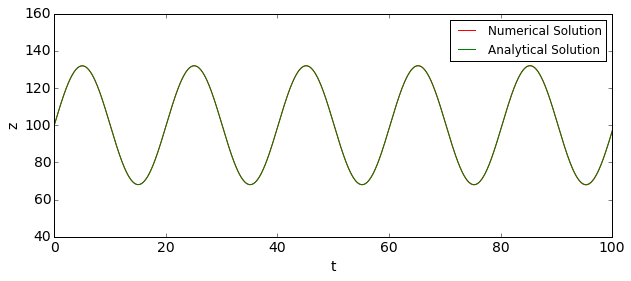

In [35]:
for i, dt in enumerate(dt_values):
    N = int(T/dt)+1
    t = numpy.linspace(0., T, N)
    z_exact = b0*(zt/g)**0.5*numpy.sin((g/zt)**0.5*t) + (z0-zt)*numpy.cos((g/zt)**0.5*t) + zt
    pyplot.figure(figsize=(10,4))
    pyplot.ylim(40,160)
    pyplot.tick_params(axis='both', labelsize=14)
    pyplot.xlabel('t', fontsize=14)
    pyplot.ylabel('z', fontsize=14)
    pyplot.plot(t,euler_func(dt), 'r')
    pyplot.plot(t,z_exact, 'g')
    pyplot.legend(['Numerical Solution', 'Analytical Solution'])
    print dt
    print euler_func(dt)